In [2]:
from __future__ import division
import imp
import uproot
import matplotlib
#matplotlib.use('agg')
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import numpy as np
import pandas as pd
import os
import ROOT
import time
import math
from array import array
import collections

inputdir = '/home/tmettler/Desktop/v08_00_00_33/V08_00_00_35/weighted/'
outputdir = inputdir+'xsec_comparsion/' 
output_filedir = outputdir
input_filedir = '/home/tmettler/Desktop/v08_00_00_33/V08_00_00_35/weighted/'
lib_function_dir = '/home/tmettler/Desktop/uBoone/do_plots/'

plot_systematic = 0

# helper functions
globale = imp.load_source('globale',lib_function_dir+'globale.py')
NuCC = imp.load_source('NuCC_function',lib_function_dir+'NuCC_function.py')
NuCC_w = imp.load_source('NuCCWeight_function',lib_function_dir+'NuCCWeight_function.py')

Welcome to JupyROOT 6.10/08


In [3]:
# initialte ROOT default canvas
ROOT.gROOT.SetBatch(ROOT.kTRUE)
ROOT.gStyle.SetOptStat(0)
ROOT.gStyle.SetOptTitle(0)
c1 = ROOT.TCanvas("c1","c1",1600,1200)
c1.SetGrid(1)
c1.SetLeftMargin(0.14)
c1.SetRightMargin(0.05)
c1.SetBottomMargin(0.14)

Warning in <TCanvas::Constructor>: Deleting canvas with same name: c1


In [4]:
outputdir_png, outputdir_root,outputdir_pdf = NuCC.prepareOutput2(outputdir)
try:
    os.stat(output_filedir)
except:
    os.mkdir(output_filedir)
RootFile = ROOT.TFile(output_filedir+"xsec_comparison.root","RECREATE");


Info in <TCanvas::Print>: png file /home/tmettler/Desktop/v08_00_00_33/V08_00_00_35/weighted/xsec_comparsion/png/h_xsec_mom_fit_res.png has been created
Info in <TCanvas::SaveAs>: ROOT file /home/tmettler/Desktop/v08_00_00_33/V08_00_00_35/weighted/xsec_comparsion/root/h_xsec_mom_fit_res.root has been created
Info in <TCanvas::Print>: pdf file /home/tmettler/Desktop/v08_00_00_33/V08_00_00_35/weighted/xsec_comparsion/pdf/h_xsec_mom_fit_res.pdf has been created


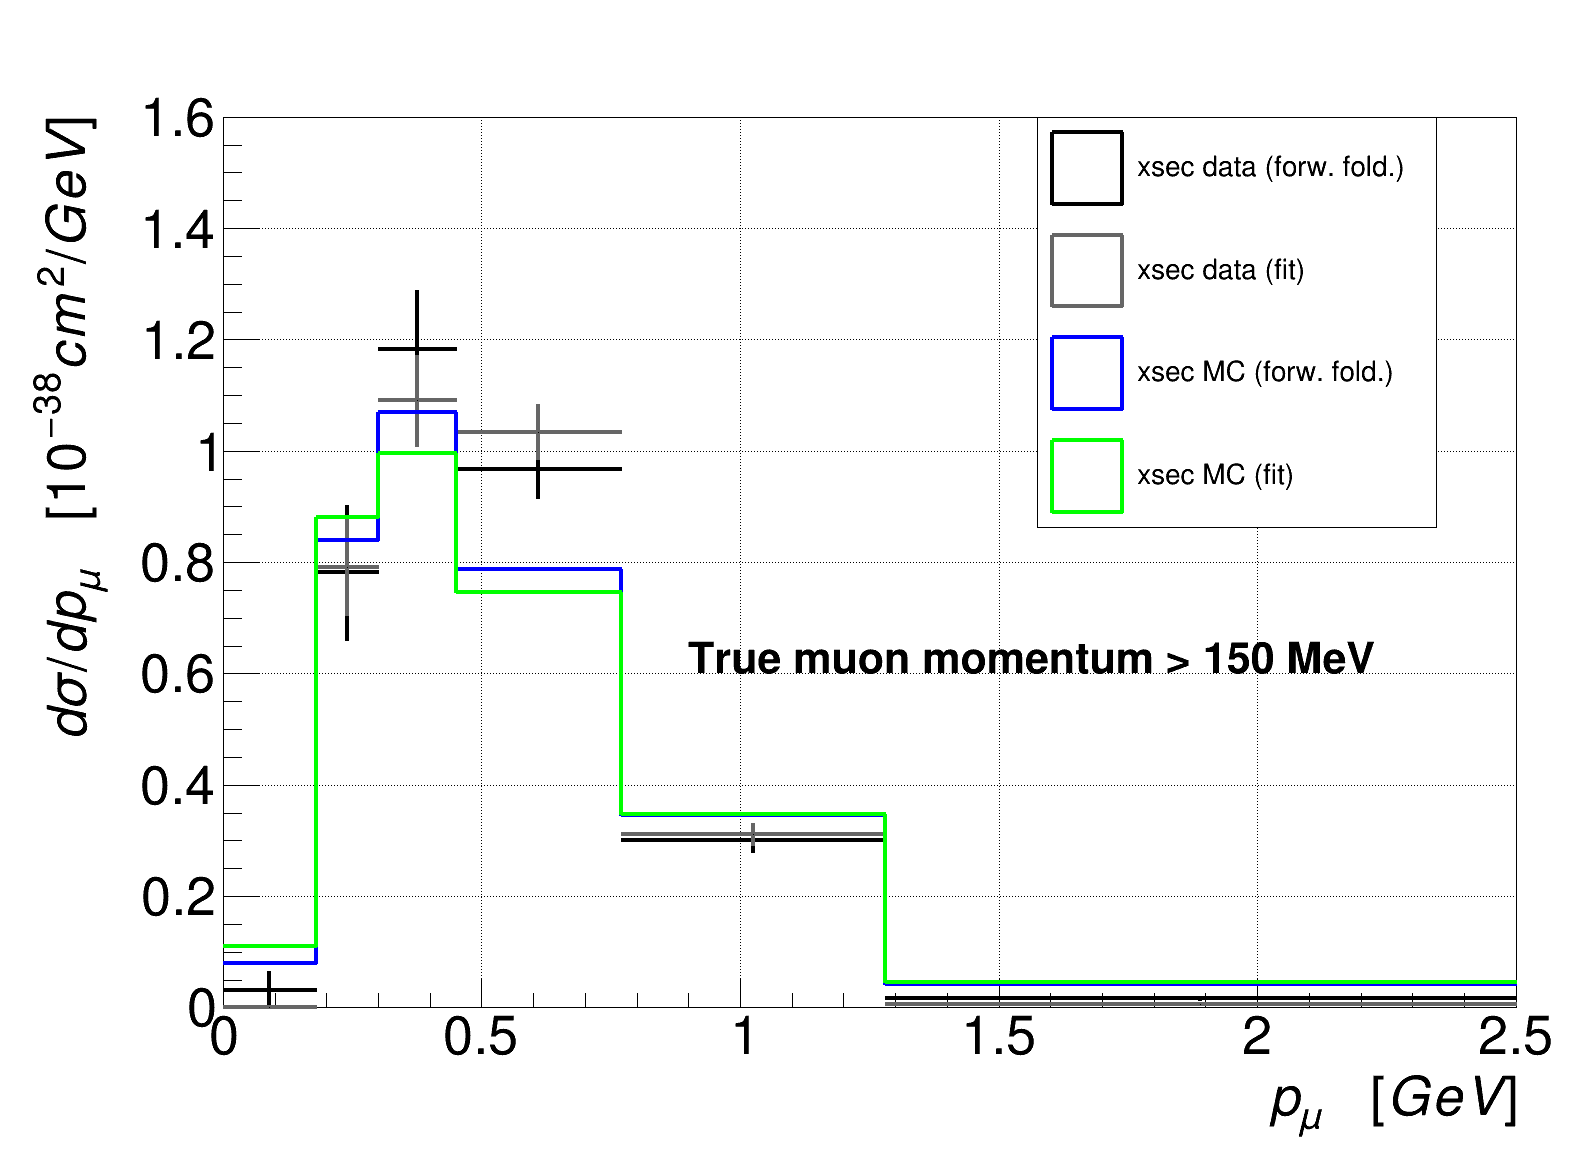

In [5]:
path = '/home/tmettler/Desktop/v08_00_00_33/V08_00_00_35/weighted/'
f_nom = ROOT.TFile.Open(path+"xsec_phasespacerestriction/xsec_momentum_wighted.root", 'read')
f_fit = ROOT.TFile.Open(path+"xsec_momentum_fit_phasespace/xsec_momentum_fit.root", 'read')

h_xsec_data_nom = f_nom.Get('h_xsec_data')
h_xsec_data_nom.GetXaxis().SetTitleSize(0.05)
h_xsec_data_nom.GetXaxis().SetLabelSize(0.05)
h_xsec_data_nom.GetXaxis().SetTitleOffset(1)
h_xsec_data_fit = f_fit.Get('h_xsec_data')

h_xsec_data_fit.SetLineColor(ROOT.kGray+2)

h_xsec_MC_nom = f_nom.Get('h_xsec_MC')
h_xsec_MC_fit = f_fit.Get('h_xsec_MC')
h_xsec_MC_nom.SetFillColor(0)
h_xsec_MC_fit.SetFillColor(0)

h_xsec_MC_nom.SetLineColor(ROOT.kBlue)
h_xsec_MC_fit.SetLineColor(ROOT.kGreen)


legend = ROOT.TLegend(0.65,0.55,0.9,0.9); #LEGEND RIGHT
legend.AddEntry(h_xsec_data_nom,'xsec data (forw. fold.)',"f")
legend.AddEntry(h_xsec_data_fit,'xsec data (fit)',"f")
legend.AddEntry(h_xsec_MC_nom,'xsec MC (forw. fold.)',"f")
legend.AddEntry(h_xsec_MC_fit,'xsec MC (fit)',"f")

h_xsec_data_nom.Draw()
h_xsec_data_fit.Draw('same')

h_xsec_MC_nom.Draw('hist same')
h_xsec_MC_fit.Draw('hist same')

legend.Draw()
t = ROOT.TLatex(0.9,0.6,"True muon momentum > 150 MeV");
t.SetTextFont(62);
t.SetTextSize(1/25.);
t.Draw();
c1.Draw()
c1.SaveAs(outputdir_png + 'h_xsec_mom_fit_res.png')
c1.SaveAs(outputdir_root + 'h_xsec_mom_fit_res.root')
c1.SaveAs(outputdir_pdf + 'h_xsec_mom_fit_res.pdf')


In [20]:
res = np.zeros((9))
chi2_nom =h_xsec_data_nom.Chi2Test(h_xsec_MC_nom,"WW P CHI2",res)
h_xsec_data_fit.SetBinError(1,h_xsec_data_nom.GetBinError(1))
h_xsec_data_fit.SetBinContent(1,0.01)

chi2_fit =h_xsec_data_fit.Chi2Test(h_xsec_MC_fit,"WW P CHI2",res)

Chi2 = 70.857677, Prob = 6.79367e-14, NDF = 5, igood = 1
Chi2 = 487.371639, Prob = 4.24495e-103, NDF = 5, igood = 1


Info in <TH1F::Chi2TestX>: There is a bin in h1 with less than 10 effective events.

Info in <TH1F::Chi2TestX>: There is a bin in h1 with less than 10 effective events.



Info in <TCanvas::Print>: png file /home/tmettler/Desktop/v08_00_00_33/V08_00_00_35/weighted/xsec_comparsion/png/h_xsec_mom_fit.png has been created
Info in <TCanvas::SaveAs>: ROOT file /home/tmettler/Desktop/v08_00_00_33/V08_00_00_35/weighted/xsec_comparsion/root/h_xsec_mom_fit.root has been created
Info in <TCanvas::Print>: pdf file /home/tmettler/Desktop/v08_00_00_33/V08_00_00_35/weighted/xsec_comparsion/pdf/h_xsec_mom_fit.pdf has been created


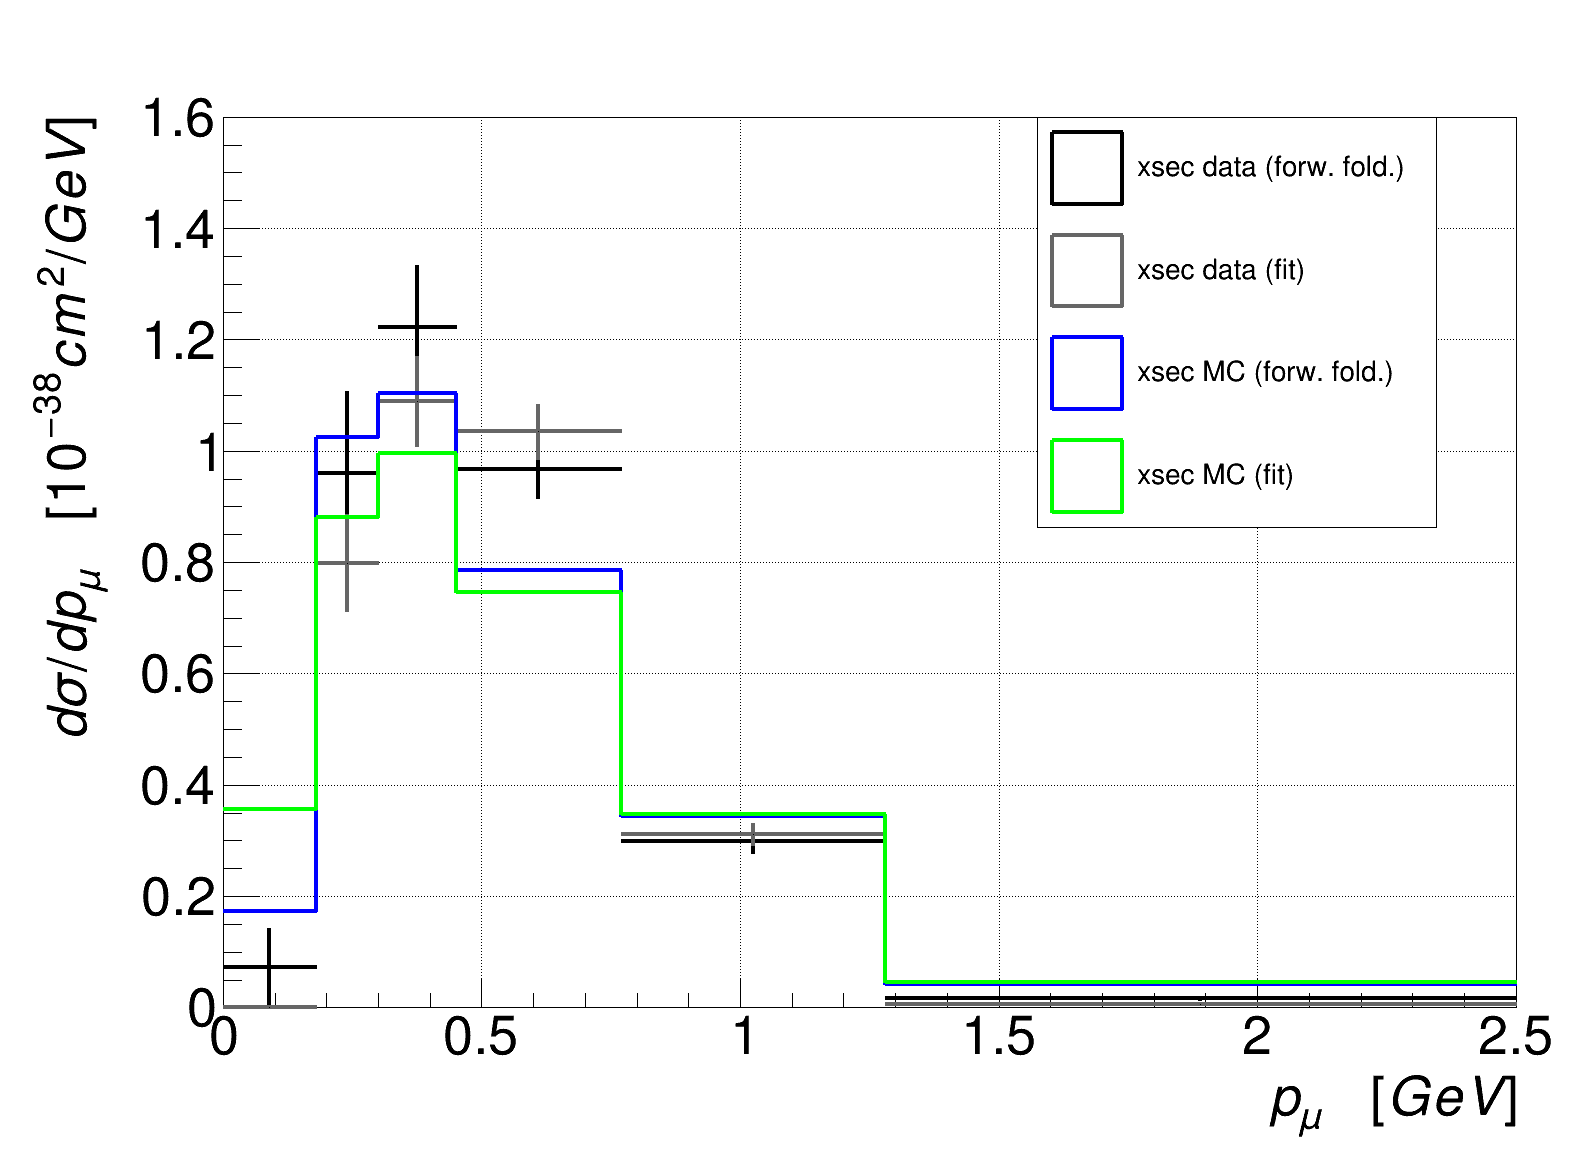

In [21]:
path = '/home/tmettler/Desktop/v08_00_00_33/V08_00_00_35/weighted/'
f_nom = ROOT.TFile.Open(path+"xsec_filesV4/xsec_momentum_wighted.root", 'read')
f_fit = ROOT.TFile.Open(path+"xsec_momentum_fit/xsec_momentum_fit.root", 'read')

h_xsec_data_nom = f_nom.Get('h_xsec_data')
h_xsec_data_nom.GetXaxis().SetTitleSize(0.05)
h_xsec_data_nom.GetXaxis().SetLabelSize(0.05)
h_xsec_data_nom.GetXaxis().SetTitleOffset(1)
h_xsec_data_fit = f_fit.Get('h_xsec_data')

h_xsec_data_fit.SetLineColor(ROOT.kGray+2)

h_xsec_MC_nom = f_nom.Get('h_xsec_MC')
h_xsec_MC_fit = f_fit.Get('h_xsec_MC')
h_xsec_MC_nom.SetFillColor(0)
h_xsec_MC_fit.SetFillColor(0)

h_xsec_MC_nom.SetLineColor(ROOT.kBlue)
h_xsec_MC_fit.SetLineColor(ROOT.kGreen)


legend = ROOT.TLegend(0.65,0.55,0.9,0.9); #LEGEND RIGHT
legend.AddEntry(h_xsec_data_nom,'xsec data (forw. fold.)',"f")
legend.AddEntry(h_xsec_data_fit,'xsec data (fit)',"f")
legend.AddEntry(h_xsec_MC_nom,'xsec MC (forw. fold.)',"f")
legend.AddEntry(h_xsec_MC_fit,'xsec MC (fit)',"f")

h_xsec_data_nom.Draw()
h_xsec_data_fit.Draw('same')

h_xsec_MC_nom.Draw('hist same')
h_xsec_MC_fit.Draw('hist same')

legend.Draw()

c1.Draw()
c1.SaveAs(outputdir_png + 'h_xsec_mom_fit.png')
c1.SaveAs(outputdir_root + 'h_xsec_mom_fit.root')
c1.SaveAs(outputdir_pdf + 'h_xsec_mom_fit.pdf')


In [22]:
res = np.zeros((6))
chi2_nom =h_xsec_data_nom.Chi2Test(h_xsec_MC_nom,"WW P CHI2",res)
h_xsec_data_fit.SetBinError(1,h_xsec_data_nom.GetBinError(1))
h_xsec_data_fit.SetBinContent(1,0.0)
chi2_fit =h_xsec_data_fit.Chi2Test(h_xsec_MC_fit,"WW P CHI2",res)

Chi2 = 68.086911, Prob = 2.56166e-13, NDF = 5, igood = 1
Chi2 = 438.154209, Prob = 1.763e-92, NDF = 5, igood = 1


Info in <TH1F::Chi2TestX>: There is a bin in h1 with less than 10 effective events.

Info in <TH1F::Chi2TestX>: There is a bin in h1 with less than 10 effective events.



Info in <TCanvas::Print>: png file /home/tmettler/Desktop/v08_00_00_33/V08_00_00_35/weighted/xsec_comparsion/png/h_xsec_mom_fit_res_both.png has been created
Info in <TCanvas::SaveAs>: ROOT file /home/tmettler/Desktop/v08_00_00_33/V08_00_00_35/weighted/xsec_comparsion/root/h_xsec_mom_fit_res_both.root has been created
Info in <TCanvas::Print>: pdf file /home/tmettler/Desktop/v08_00_00_33/V08_00_00_35/weighted/xsec_comparsion/pdf/h_xsec_mom_fit_res_both.pdf has been created


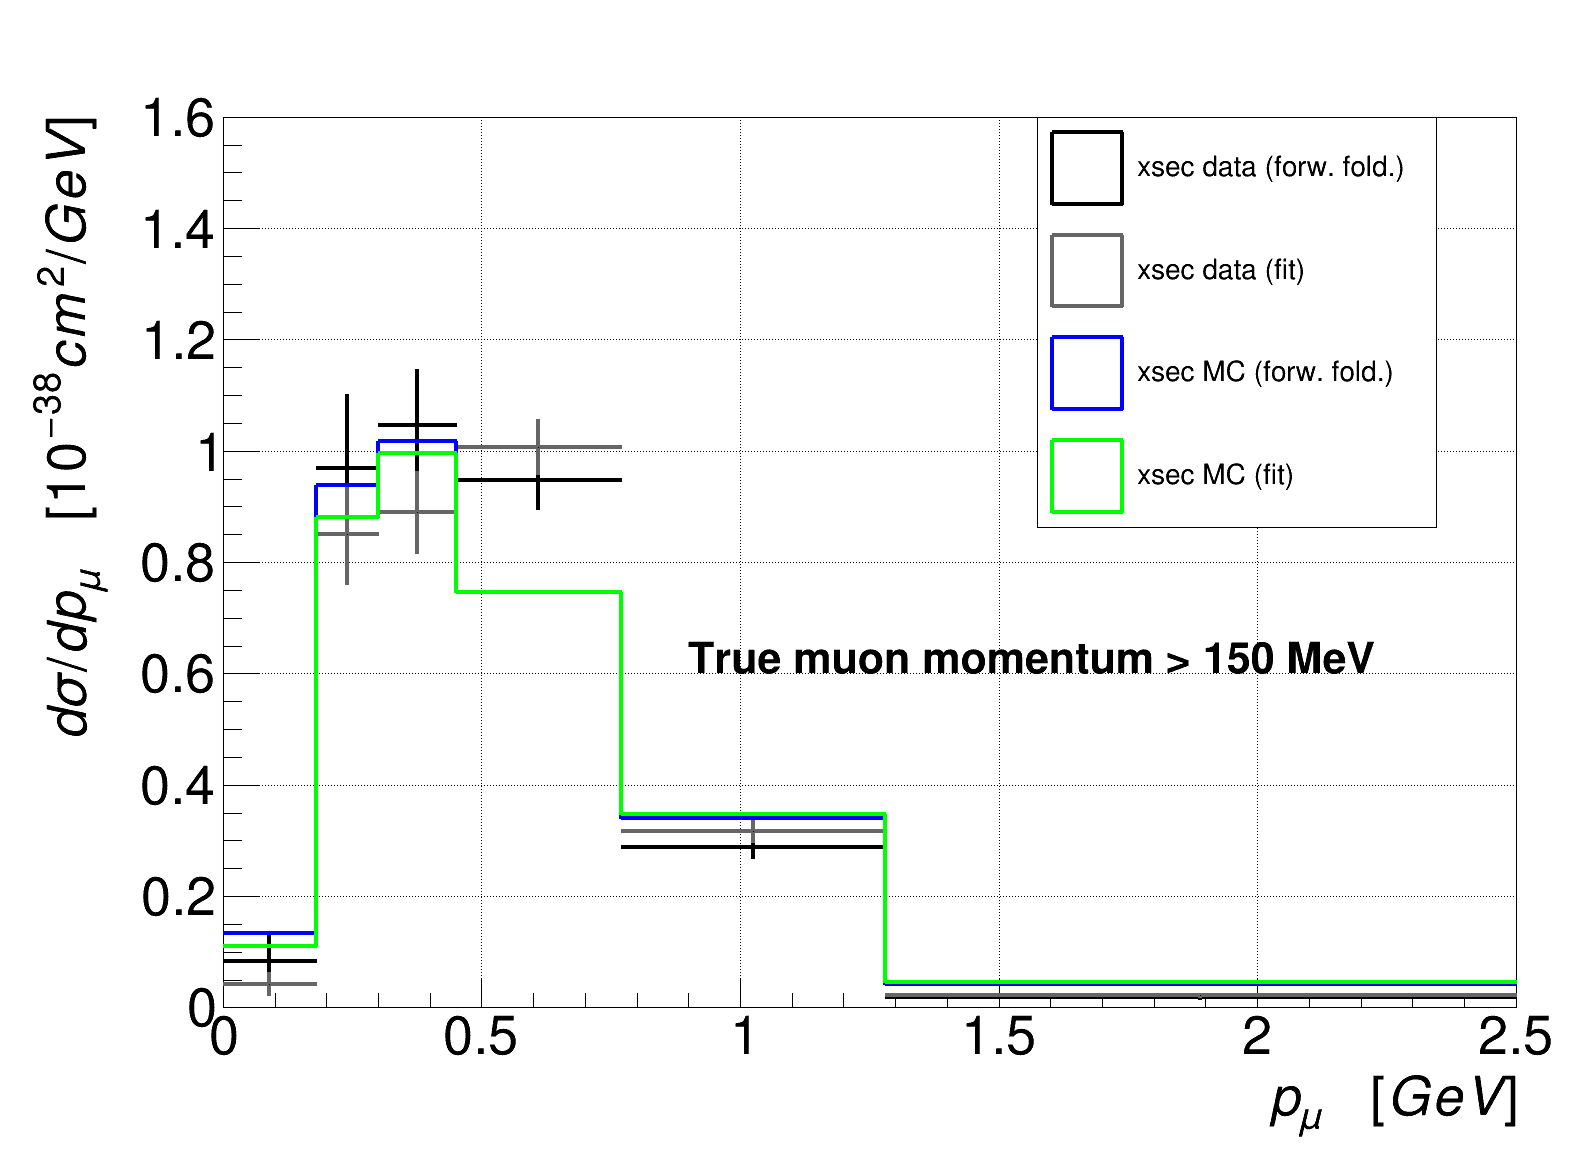

In [9]:
path = '/home/tmettler/Desktop/v08_00_00_33/V08_00_00_35/weighted/'
f_nom = ROOT.TFile.Open(path+"xsec_momentum_both_phasespace/xsec_momentum_wighted.root", 'read')
f_fit = ROOT.TFile.Open(path+"xsec_momentum_fit_res_both/xsec_momentum_fit.root", 'read')

h_xsec_data_nom = f_nom.Get('h_xsec_data')
h_xsec_data_nom.GetXaxis().SetTitleSize(0.05)
h_xsec_data_nom.GetXaxis().SetLabelSize(0.05)
h_xsec_data_nom.GetXaxis().SetTitleOffset(1)
h_xsec_data_fit = f_fit.Get('h_xsec_data')

h_xsec_data_fit.SetLineColor(ROOT.kGray+2)

h_xsec_MC_nom = f_nom.Get('h_xsec_MC')
h_xsec_MC_fit = f_fit.Get('h_xsec_MC')
h_xsec_MC_nom.SetFillColor(0)
h_xsec_MC_fit.SetFillColor(0)

h_xsec_MC_nom.SetLineColor(ROOT.kBlue)
h_xsec_MC_fit.SetLineColor(ROOT.kGreen)


legend = ROOT.TLegend(0.65,0.55,0.9,0.9); #LEGEND RIGHT
legend.AddEntry(h_xsec_data_nom,'xsec data (forw. fold.)',"f")
legend.AddEntry(h_xsec_data_fit,'xsec data (fit)',"f")
legend.AddEntry(h_xsec_MC_nom,'xsec MC (forw. fold.)',"f")
legend.AddEntry(h_xsec_MC_fit,'xsec MC (fit)',"f")

h_xsec_data_nom.Draw()
h_xsec_data_fit.Draw('same')

h_xsec_MC_nom.Draw('hist same')
h_xsec_MC_fit.Draw('hist same')

legend.Draw()
t = ROOT.TLatex(0.9,0.6,"True muon momentum > 150 MeV");
t.SetTextFont(62);
t.SetTextSize(1/25.);
t.Draw();
c1.Draw()
c1.SaveAs(outputdir_png + 'h_xsec_mom_fit_res_both.png')
c1.SaveAs(outputdir_root + 'h_xsec_mom_fit_res_both.root')
c1.SaveAs(outputdir_pdf + 'h_xsec_mom_fit_res_both.pdf')


In [10]:
res = np.zeros((6))
chi2_nom =h_xsec_data_nom.Chi2Test(h_xsec_MC_nom,"WW P CHI2",res)
#h_xsec_data_fit.SetBinError(1,h_xsec_data_nom.GetBinError(1))
#h_xsec_data_fit.SetBinContent(1,0.0)
chi2_fit =h_xsec_data_fit.Chi2Test(h_xsec_MC_fit,"WW P CHI2",res)

Chi2 = 75.785361, Prob = 6.37808e-15, NDF = 5, igood = 1
Chi2 = 88.899748, Prob = 1.14395e-17, NDF = 5, igood = 1


Info in <TH1F::Chi2TestX>: There is a bin in h1 with less than 10 effective events.

Info in <TH1F::Chi2TestX>: There is a bin in h1 with less than 10 effective events.



Info in <TCanvas::Print>: png file /home/tmettler/Desktop/v08_00_00_33/V08_00_00_35/weighted/xsec_comparsion/png/h_xsec_theta_fit_res.png has been created
Info in <TCanvas::SaveAs>: ROOT file /home/tmettler/Desktop/v08_00_00_33/V08_00_00_35/weighted/xsec_comparsion/root/h_xsec_theta_fit_res.root has been created
Info in <TCanvas::Print>: pdf file /home/tmettler/Desktop/v08_00_00_33/V08_00_00_35/weighted/xsec_comparsion/pdf/h_xsec_theta_fit_res.pdf has been created


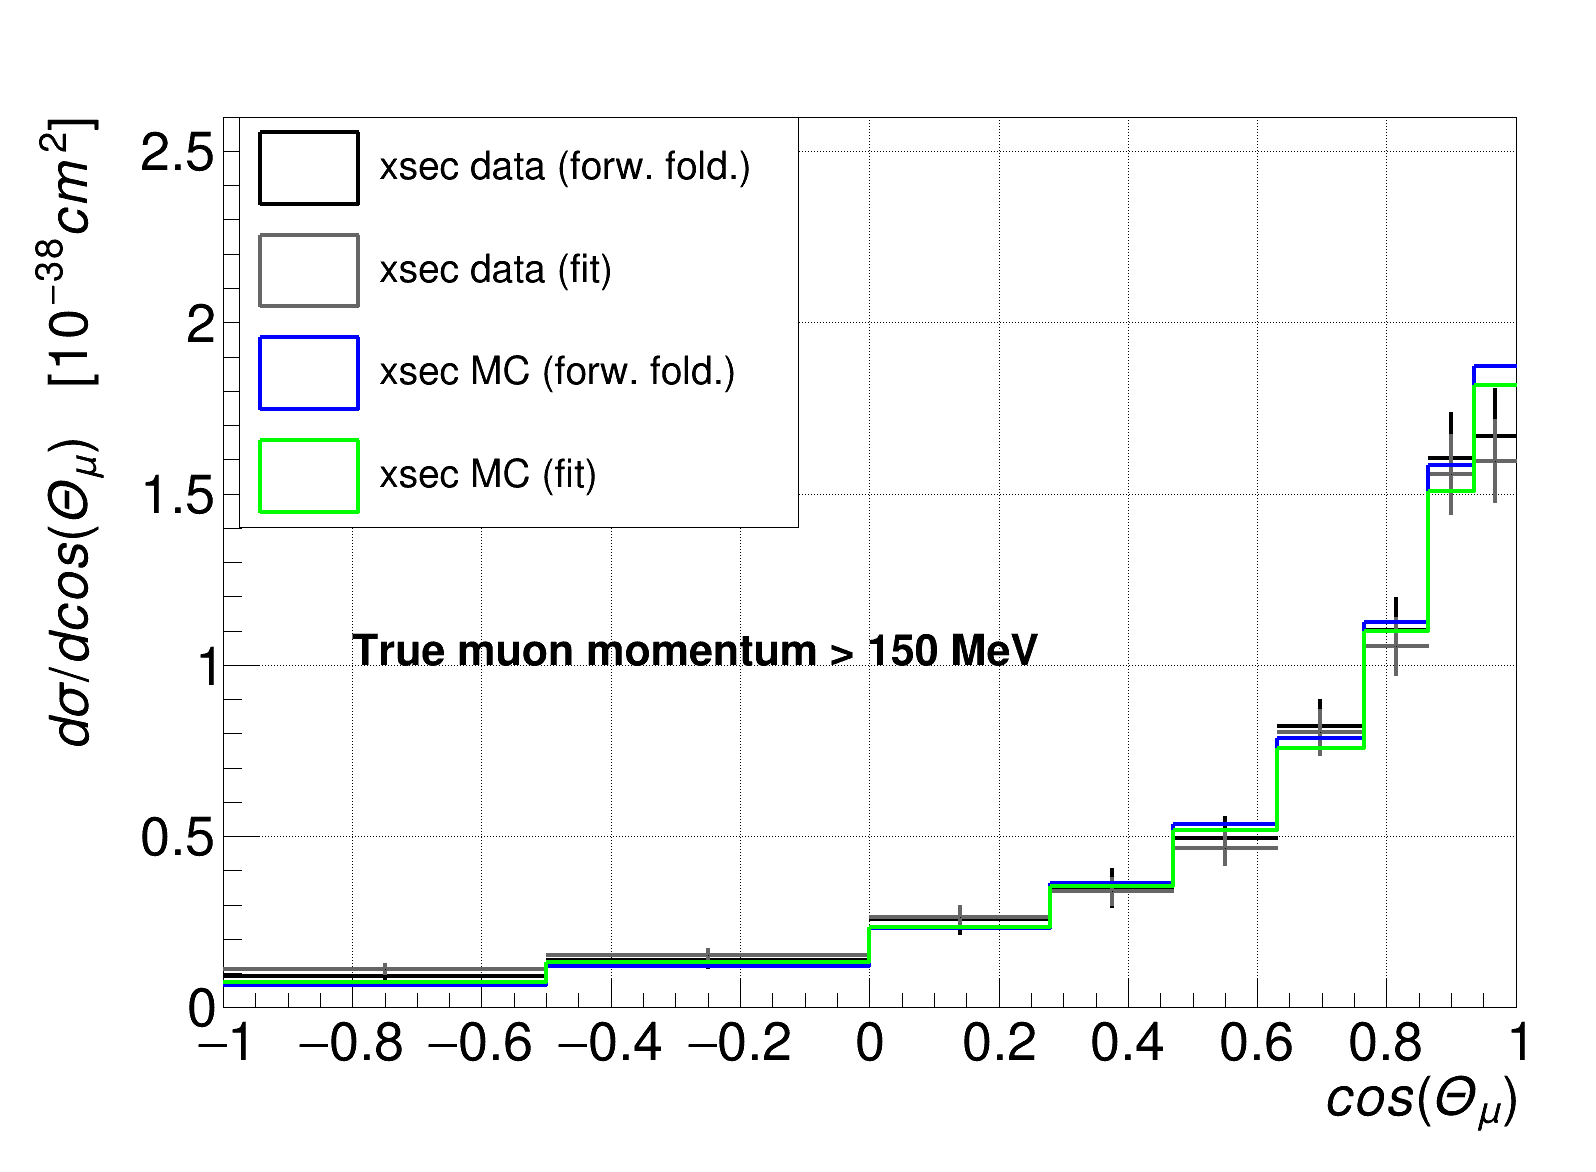

In [25]:
path = '/home/tmettler/Desktop/v08_00_00_33/V08_00_00_35/weighted/'
f_nom = ROOT.TFile.Open(path+"xsec_phasespacerestriction/xsec_theta_wighted.root", 'read')
f_fit = ROOT.TFile.Open(path+"xsec_theta_fit_phasespace/xsec_theta_fit.root", 'read')

h_xsec_data_nom = f_nom.Get('h_xsec_data_theta')
h_xsec_data_nom.GetXaxis().SetTitleSize(0.05)
h_xsec_data_nom.GetXaxis().SetLabelSize(0.05)
h_xsec_data_nom.GetXaxis().SetTitleOffset(1)
h_xsec_data_fit = f_fit.Get('h_xsec_data')

h_xsec_data_fit.SetLineColor(ROOT.kGray+2)

h_xsec_MC_nom = f_nom.Get('h_xsec_MC_theta')
h_xsec_MC_fit = f_fit.Get('h_xsec_MC')
h_xsec_MC_nom.SetFillColor(0)
h_xsec_MC_fit.SetFillColor(0)

h_xsec_MC_nom.SetLineColor(ROOT.kBlue)
h_xsec_MC_fit.SetLineColor(ROOT.kGreen)


legend = ROOT.TLegend(0.15,0.55,0.5,0.9); #LEGEND RIGHT
legend.AddEntry(h_xsec_data_nom,'xsec data (forw. fold.)',"f")
legend.AddEntry(h_xsec_data_fit,'xsec data (fit)',"f")
legend.AddEntry(h_xsec_MC_nom,'xsec MC (forw. fold.)',"f")
legend.AddEntry(h_xsec_MC_fit,'xsec MC (fit)',"f")

h_xsec_data_nom.Draw()
h_xsec_data_fit.Draw('same')

h_xsec_MC_nom.Draw('hist same')
h_xsec_MC_fit.Draw('hist same')

legend.Draw()
t = ROOT.TLatex(-0.8,1,"True muon momentum > 150 MeV");
t.SetTextFont(62);
t.SetTextSize(1/25.);
t.Draw();
c1.Draw()
c1.SaveAs(outputdir_png + 'h_xsec_theta_fit_res.png')
c1.SaveAs(outputdir_root + 'h_xsec_theta_fit_res.root')
c1.SaveAs(outputdir_pdf + 'h_xsec_theta_fit_res.pdf')


In [26]:
res = np.zeros((9))
chi2_nom =h_xsec_data_nom.Chi2Test(h_xsec_MC_nom,"WW P CHI2",res)

chi2_fit =h_xsec_data_fit.Chi2Test(h_xsec_MC_fit,"WW P CHI2",res)

Chi2 = 5.102980, Prob = 0.746515, NDF = 8, igood = 0
Chi2 = 12.716020, Prob = 0.122001, NDF = 8, igood = 0


Info in <TCanvas::Print>: png file /home/tmettler/Desktop/v08_00_00_33/V08_00_00_35/weighted/xsec_comparsion/png/h_xsec_theta_fit.png has been created
Info in <TCanvas::SaveAs>: ROOT file /home/tmettler/Desktop/v08_00_00_33/V08_00_00_35/weighted/xsec_comparsion/root/h_xsec_theta_fit.root has been created
Info in <TCanvas::Print>: pdf file /home/tmettler/Desktop/v08_00_00_33/V08_00_00_35/weighted/xsec_comparsion/pdf/h_xsec_theta_fit.pdf has been created


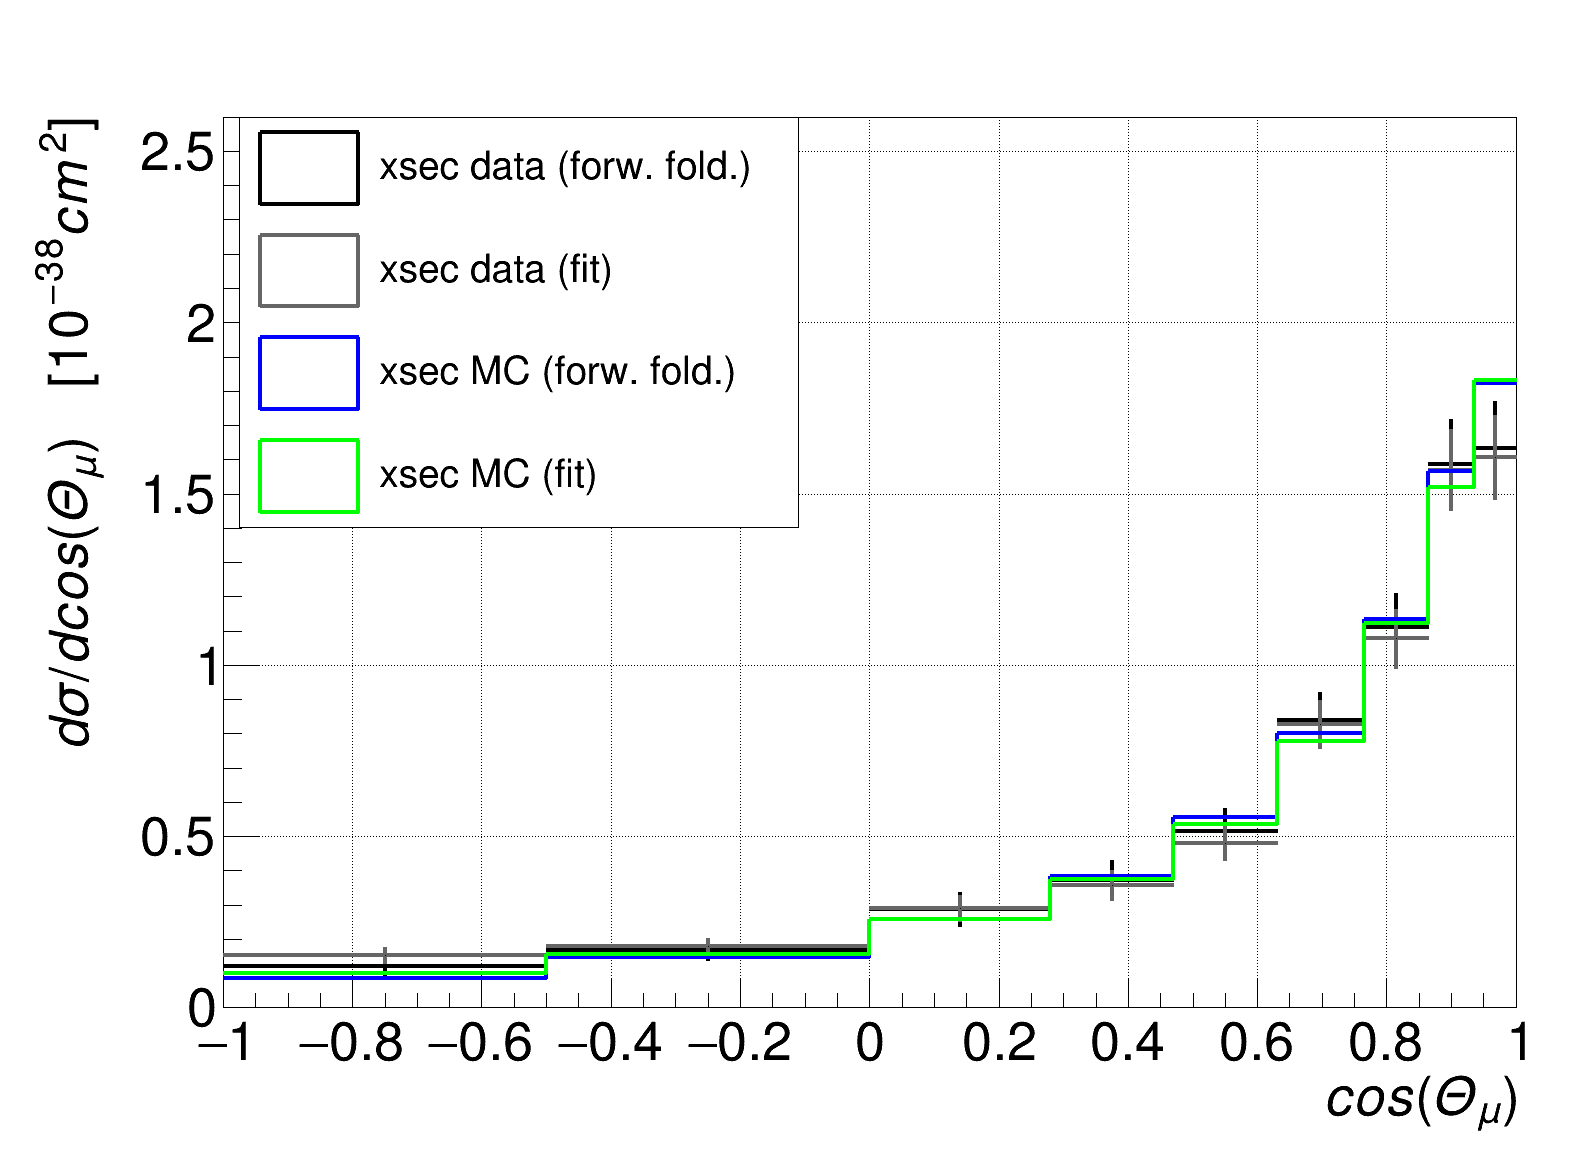

In [10]:
path = '/home/tmettler/Desktop/v08_00_00_33/V08_00_00_35/weighted/'
f_nom = ROOT.TFile.Open(path+"xsec_filesV4/xsec_theta_wighted.root", 'read')
f_fit = ROOT.TFile.Open(path+"xsec_theta_fit/xsec_theta_fit.root", 'read')

h_xsec_data_nom = f_nom.Get('h_xsec_data_theta')
h_xsec_data_nom.GetXaxis().SetTitleSize(0.05)
h_xsec_data_nom.GetXaxis().SetLabelSize(0.05)
h_xsec_data_nom.GetXaxis().SetTitleOffset(1)
h_xsec_data_fit = f_fit.Get('h_xsec_data')

h_xsec_data_fit.SetLineColor(ROOT.kGray+2)

h_xsec_MC_nom = f_nom.Get('h_xsec_MC_theta')
h_xsec_MC_fit = f_fit.Get('h_xsec_MC')
h_xsec_MC_nom.SetFillColor(0)
h_xsec_MC_fit.SetFillColor(0)

h_xsec_MC_nom.SetLineColor(ROOT.kBlue)
h_xsec_MC_fit.SetLineColor(ROOT.kGreen)


legend = ROOT.TLegend(0.15,0.55,0.5,0.9); #LEGEND RIGHT
legend.AddEntry(h_xsec_data_nom,'xsec data (forw. fold.)',"f")
legend.AddEntry(h_xsec_data_fit,'xsec data (fit)',"f")
legend.AddEntry(h_xsec_MC_nom,'xsec MC (forw. fold.)',"f")
legend.AddEntry(h_xsec_MC_fit,'xsec MC (fit)',"f")

h_xsec_data_nom.Draw()
h_xsec_data_fit.Draw('same')

h_xsec_MC_nom.Draw('hist same')
h_xsec_MC_fit.Draw('hist same')

legend.Draw()

c1.Draw()
c1.SaveAs(outputdir_png + 'h_xsec_theta_fit.png')
c1.SaveAs(outputdir_root + 'h_xsec_theta_fit.root')
c1.SaveAs(outputdir_pdf + 'h_xsec_theta_fit.pdf')


In [11]:
res = np.zeros((9))
chi2_nom =h_xsec_data_nom.Chi2Test(h_xsec_MC_nom,"WW P CHI2",res)

chi2_fit =h_xsec_data_fit.Chi2Test(h_xsec_MC_fit,"WW P CHI2",res)

Chi2 = 4.942139, Prob = 0.763742, NDF = 8, igood = 0
Chi2 = 12.361117, Prob = 0.135804, NDF = 8, igood = 0


In [15]:
for i in range(1,10):
    print 'bin: ',i,' ---------------'
    print h_xsec_data_nom.GetBinContent(i),' - ', h_xsec_data_nom.GetBinError(i)
    print h_xsec_data_fit.GetBinContent(i),' - ', h_xsec_data_fit.GetBinError(i)
    print h_xsec_MC_nom.GetBinContent(i),' - ', h_xsec_MC_nom.GetBinError(i)
    print h_xsec_MC_fit.GetBinContent(i),' - ', h_xsec_MC_fit.GetBinError(i)
    

bin:  1  ---------------
0.122231677175  -  0.0276718766926
0.153508663177  -  0.0225988022308
0.0863590314984  -  0.00298713440471
0.100832253695  -  0.00287855881024
bin:  2  ---------------
0.167518571019  -  0.0296081911211
0.179609924555  -  0.0243681891449
0.14573225379  -  0.00326757381991
0.156095385551  -  0.00202128109361
bin:  3  ---------------
0.287445008755  -  0.0484524914583
0.289539515972  -  0.037624732928
0.259251654148  -  0.00513966224128
0.257557243109  -  0.00250157052036
bin:  4  ---------------
0.370980530977  -  0.0588143579554
0.357214868069  -  0.0443186488579
0.383088290691  -  0.00661289832262
0.373509049416  -  0.00287298591112
bin:  5  ---------------
0.515427529812  -  0.0663519233487
0.480416566133  -  0.0515214280872
0.554926216602  -  0.00811130867159
0.535723924637  -  0.00359333174415
bin:  6  ---------------
0.838753044605  -  0.0810639955627
0.827359080315  -  0.0691775580032
0.802249729633  -  0.0100738214705
0.778308749199  -  0.00507176097371
